In [1]:
import json
import base64
import requests
import cv2
import matplotlib.pyplot as plt
import function as func

In [5]:
img = cv2.imread('D:/111project/github/041-111project/Image_Server/images/test-image/test-crop.png')
retval, buffer = cv2.imencode('.jpg',img)
image_data = base64.b64encode(buffer)
image_data = image_data.decode()

data = json.dumps({
    'data': image_data
    # ,'type':'calc'
})
response = requests.post('http://120.101.3.229:5000/predict', headers={'Content-Type': 'application/json'}, data=data)

print(response.status_code)
print(response.text)

200
{"predictions":"Malignant"}



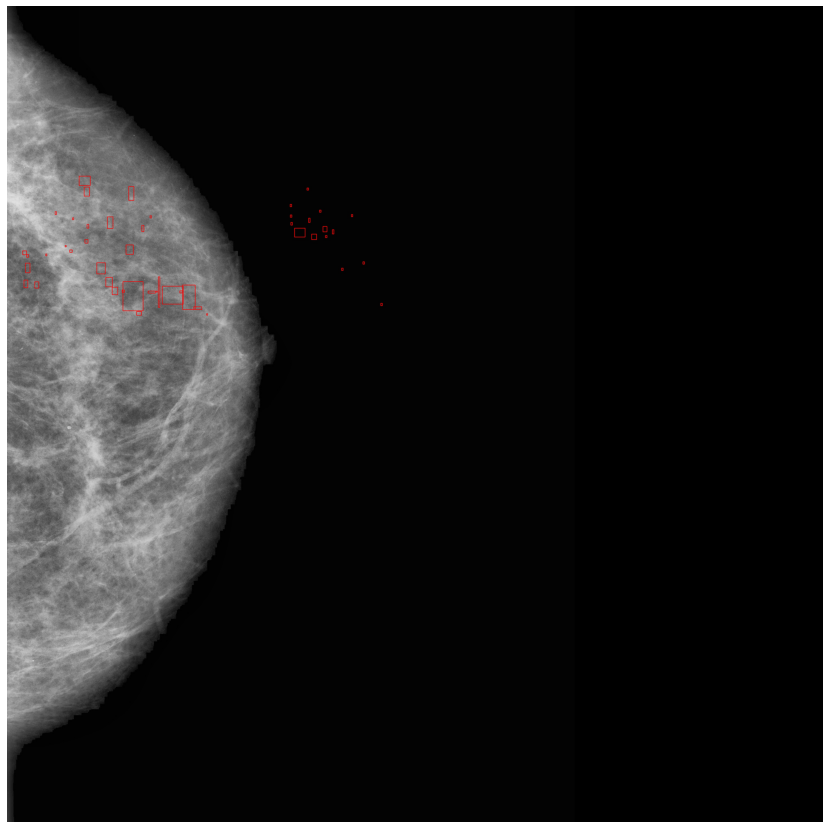

In [7]:
# Test if the compare image part is working correctly

data_compare = json.dumps({
    'id1':'1',
    'id2':'3',
    'img_type':'CC'
})
response = requests.post('http://120.101.3.229:5000/compare/compare_image', headers={'Content-Type': 'application/json'}, data=data_compare)

base64_image = response.json()['image']
image = func.decode_base64(base64_image,if_resize=False)
func.plot_imgs([image[0]])

It's list


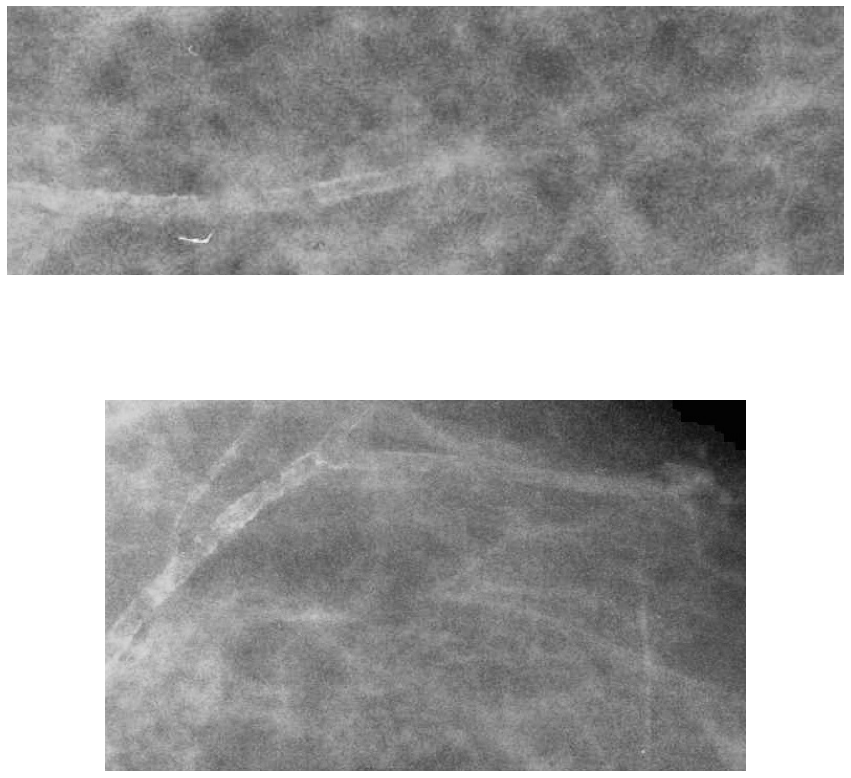

In [29]:
# Test if generate cropped image is working correctly

data_crop = json.dumps({
    'id':'2',
    'img_type':'CC'
})
response = requests.post('http://120.101.3.229:5000/compare/generate_cropped', headers={'Content-Type': 'application/json'}, data=data_crop)

base64_image = response.json()['image']
if type(base64_image) == type(list()):
    print("It's list")
    image = list()
    for item in base64_image:
        image.append(func.decode_base64(item,if_resize=False))
    func.plot_imgs([image[0][0],image[1][0]])
else:
    print("It's str")
    image = func.decode_base64(base64_image,if_resize=False)
    func.plot_imgs(image)




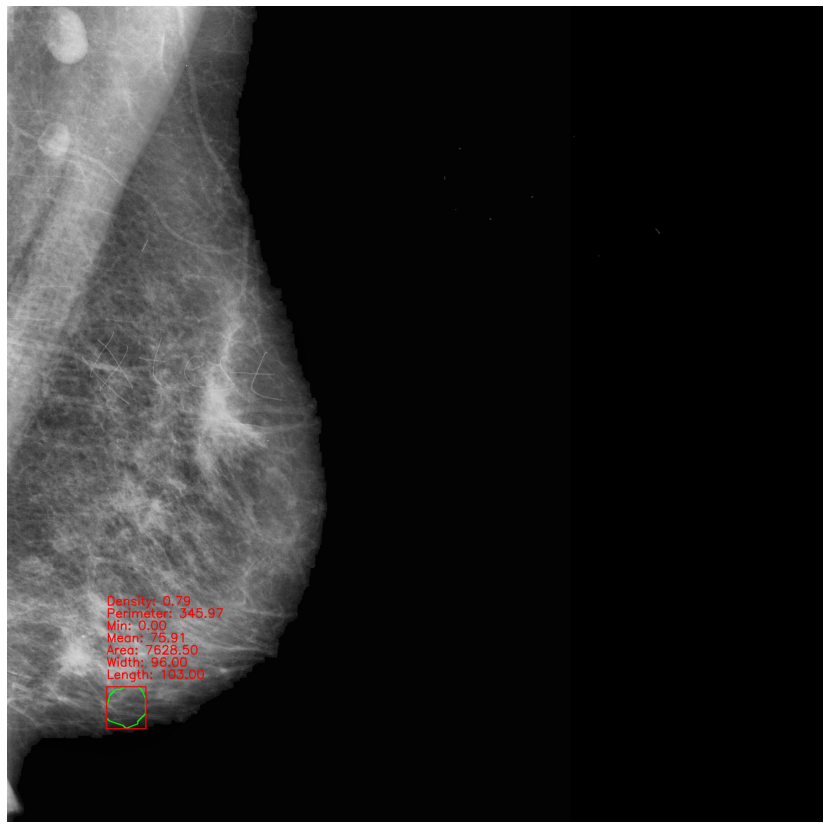

In [33]:
# Test if marking abnormal is working correctly
data_mark = json.dumps({
    'id':'3',
    'img_type':'MLO'
})
response = requests.post('http://120.101.3.229:5000/compare/marking_abnormal', headers={'Content-Type': 'application/json'}, data=data_mark)

base64_image = response.json()['image']
image = func.decode_base64(base64_image,if_resize=False)
func.plot_imgs(image)

In [35]:
test_face = cv2.imread("D:/111project/github/041-111project/Flask_Service/Face_Test/test-1.jpg")
retval, buffer = cv2.imencode('.jpg',test_face)
base64_image = base64.b64encode(buffer)
base64_image = base64_image.decode()

data_face = json.dumps({
    'image': base64_image
})

response = requests.post('http://120.101.3.229:5000/facenet', headers={'Content-Type': 'application/json'}, data=data_face)
print(response.text)

{"PID":"004"}

